In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary/Salary Data.csv


In [4]:
#read data
data = pd.read_csv('/kaggle/input/salary/Salary Data.csv')

In [5]:
#present the first 5 rows 
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [6]:
# describe numerical data
data.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [7]:
# describe catigorical data
data.describe(include='object')

,Gender,Education Level,Job Title
count,373,373,373
unique,2,3,174
top,Male,Bachelor's,Director of Marketing
freq,194,224,12


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


# __data preprocessing and visualization__

In [9]:
data.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [10]:
# Fill numerical data with mean and categorical data with mode
dtypes = data.dtypes

for name, type_ in dtypes.items():
    if str(type_) == 'object':
        mode_value = data[name].mode()[0]
        data[name].fillna(mode_value, inplace=True)
        
    else: 
        mean_value = data[name].mean()
        data[name].fillna(mean_value, inplace=True)

print(data.isnull().sum())

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


/tmp/ipykernel_34/2029520460.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[name].fillna(mean_value, inplace=True)
/tmp/ipykernel_34/2029520460.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [13]:
#encoding numerical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dtypes = data.dtypes

for name,type_ in dtypes.items():
    if str(type_) == 'object':
        data[name] = le.fit_transform(data[name])    

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  375 non-null    float64
 1   Gender               375 non-null    int64  
 2   Education Level      375 non-null    int64  
 3   Job Title            375 non-null    int64  
 4   Years of Experience  375 non-null    float64
 5   Salary               375 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 17.7 KB


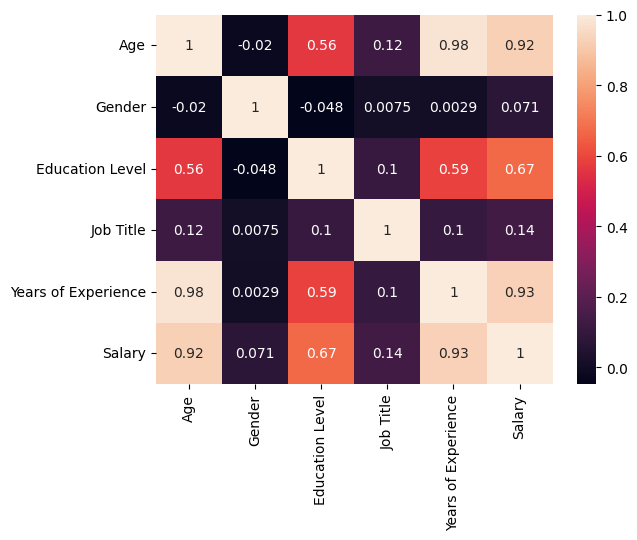

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.corr() ,annot = True)
plt.show()

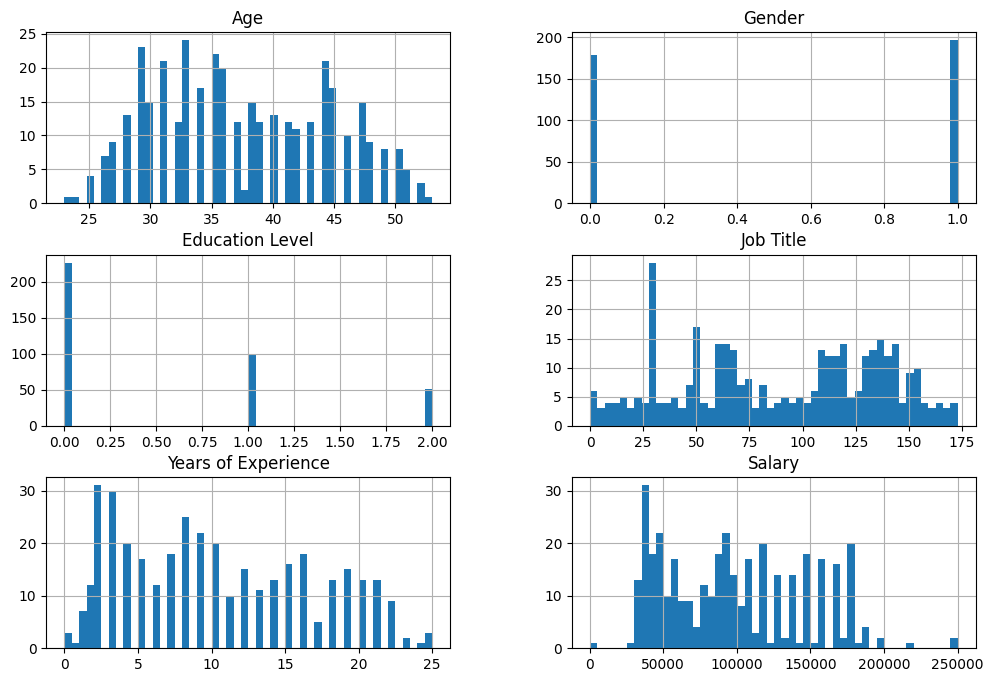

In [16]:
data.hist(bins=50 , figsize=(12,8))
plt.show()

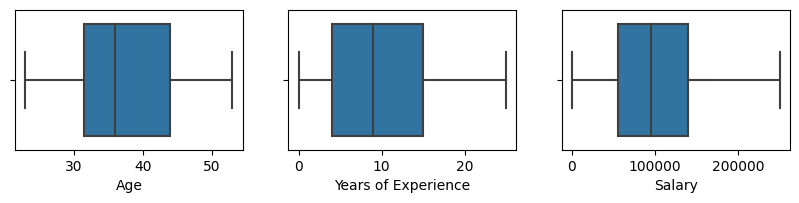

In [17]:
#check outliers in numerical columns 
plt.figure(figsize=(10, 4))
plt.subplot(2,3,1)
sns.boxplot(x=data['Age'])
plt.subplot(2,3,2)
sns.boxplot(x=data['Years of Experience'])
plt.subplot(2,3,3)
sns.boxplot(x=data['Salary'])
plt.show()

there is no outlier in this data

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

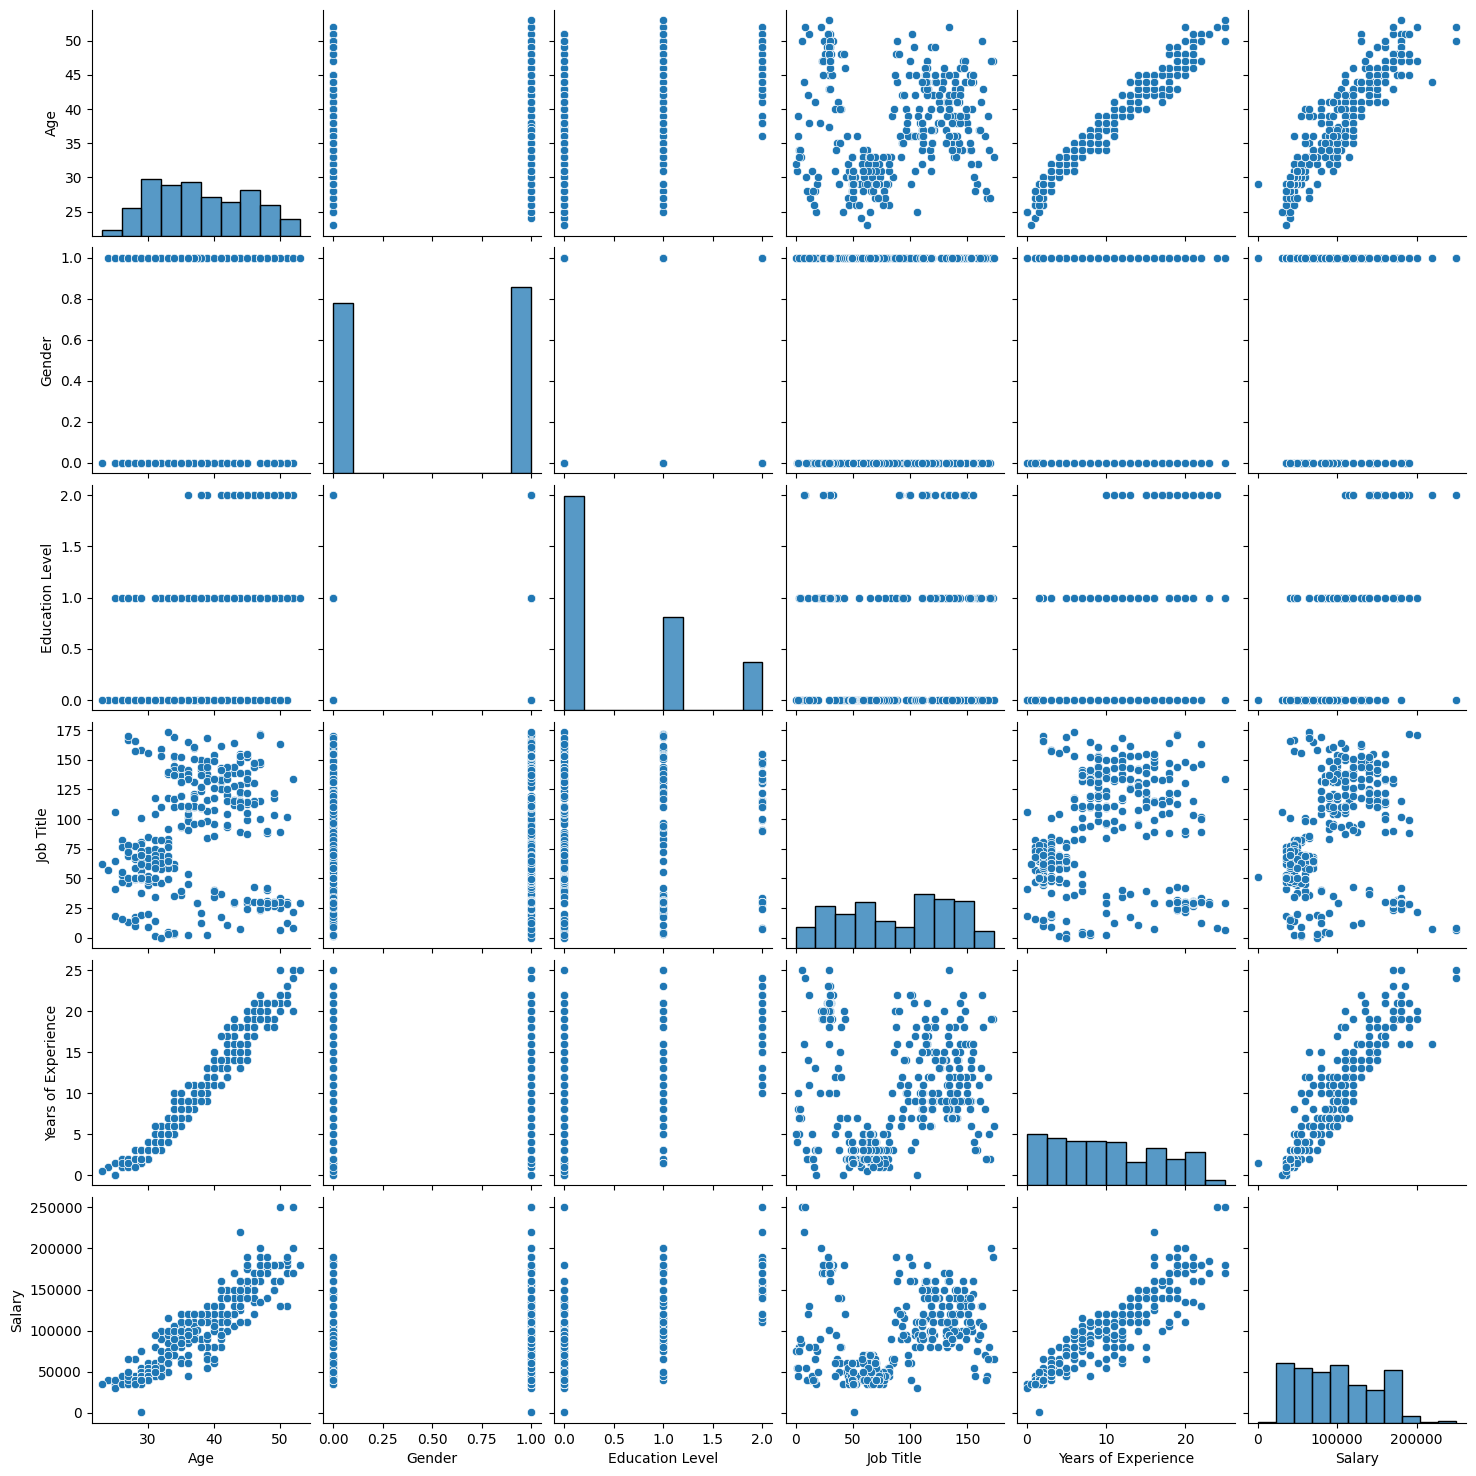

In [18]:
sns.pairplot(data)

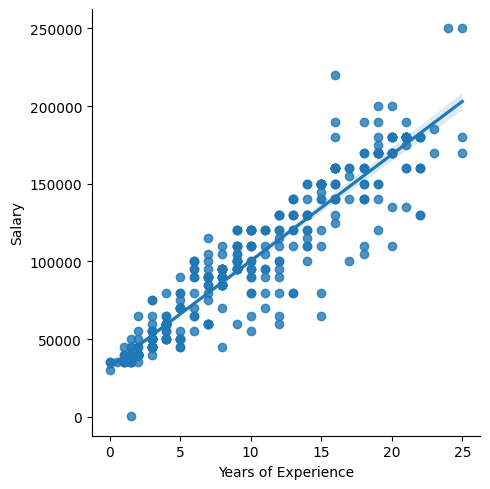

In [19]:
sns.lmplot(data=data, x='Years of Experience', y='Salary')

# __Training and Testing Data__

In [20]:
#splitting data into features and target
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [21]:
#splitting data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x , y , test_size=0.2 , random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(300, 5)
(75, 5)
(300,)
(75,)


In [22]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train,y_train)

LinearRegression()

In [23]:
#Slope of the model
model.coef_

array([ 2661.7081676 ,  8352.52358366, 14651.00910123,    27.69089763,
        2960.13580947])

In [24]:
#Intercept of the model
model.intercept_

-43654.9168321514

In [25]:
model.coef_.dot(x_test.iloc[10, :]) + model.intercept_

66285.19145657652

In [26]:
y_pred = model.predict(x_test)
y_pred

array([ 54046.3879775 ,  43778.05367252,  88118.70508054,  94825.35475894,
       124902.48457598,  79710.28809147, 173791.20718554,  99660.82067654,
       102323.86958266,  44381.08118833,  66285.19145658,  49551.94178147,
        45493.23840204,  60865.11278475,  50050.37793883,  46779.47002335,
        87273.87689773,  99442.67549053, 170131.87772273,  52955.13195303,
       120884.71850139, 161328.37075515,  60740.24794034, 102045.61986783,
       150210.29662594, 177569.35650497,  82486.14184463, 158680.76384145,
        41393.25448123, 150210.29662594, 147887.54766108, 156102.12836674,
       130500.72016845, 164482.34284803,  66320.81137603,  79558.24395957,
       121338.98832143, 124531.23898632, 136540.01732901,  43971.88995593,
        76813.46309909,  49372.20675195, 117250.44692168,  79710.28809147,
        82735.35992331, 138497.15568811, 119078.63792332,  23386.22351511,
       154278.06834064, 161040.66237213,  90981.66694322, 139631.19021496,
       162829.85145928,  

In [29]:
#Calculate R-squared score
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.4f}")

R-squared score: 0.9019


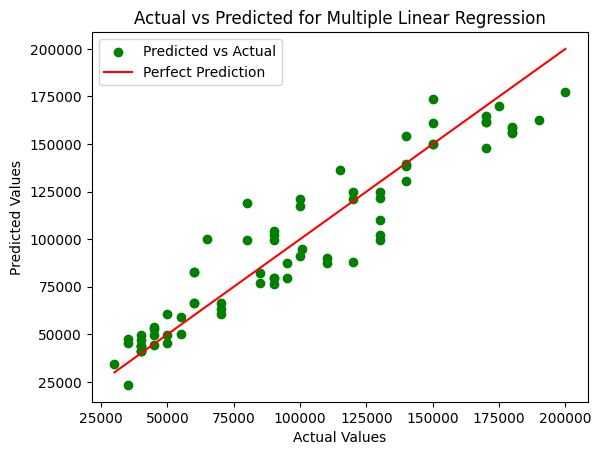

In [28]:
#Scatter plot for Actual vs Predicted values
plt.scatter(y_test, y_pred, color='green', label='Predicted vs Actual')

#Plot a line showing best fit line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted for Multiple Linear Regression')
plt.legend()
plt.show()